In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid", context="talk")

In [2]:
def draw_rewards(rewards, n):
    episodes = np.arange(len(rewards))
    df = pd.DataFrame({
        "episode": episodes,
        "reward" : rewards,
    })

    win = 100
    df["roll_mean"] = (
        df["reward"]
        .rolling(window=win, min_periods=1)
        .mean()
    )

    df["roll_sem"]  = df["reward"].rolling(win).sem()

    plt.figure(figsize=(12, 5))

    alpha = 0.10 
    df["ema"] = df["reward"].ewm(alpha=alpha).mean()
    sns.lineplot(data=df, x="episode", y="reward", color="steelblue", alpha=.2, label="raw")
    sns.lineplot(data=df, x="episode", y="ema", color="tomato", linewidth=2, label=f"EMA α={alpha}")

    plt.fill_between(
        df["episode"],
        df["roll_mean"] - 1.96*df["roll_sem"],
        df["roll_mean"] + 1.96*df["roll_sem"],
        alpha=.2
    )
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.title(f"Training Reward (Smoothed) - {n} agents")
    plt.legend(frameon=False, loc=2)
    plt.tight_layout()
    plt.show()

    return df

def draw_comparison(rewards, labels):
    plt.figure(figsize=(12, 8))

    for r, label in zip(rewards, labels):
        sns.lineplot(data=r, x="episode", y="ema", label=label)
    
    plt.xlabel("Episode")
    plt.ylabel("Total reward")
    plt.legend(frameon=False)
    plt.tight_layout()
    plt.show()

In [3]:
# our implementation of matd3
rewards_2 = np.load("../models/eval_reward_2.npy")
rewards_3 = np.load("../models/eval_reward_3.npy")
rewards_4 = np.load("../models/eval_reward_4.npy")
rewards_8 = np.load("../models/eval_reward_8.npy")
rewards_16 = np.load("../models/eval_reward_16.npy")

# stablebaselines 3
td3_rewards_2 = np.load("../models/eval_reward_2_td3.npz")["results"][25:].flatten()
td3_rewards_4 = np.load("../models/eval_reward_4_td3.npz")["results"][25:].flatten()

In [4]:
smoothed_rewards = []

## MATD3 results

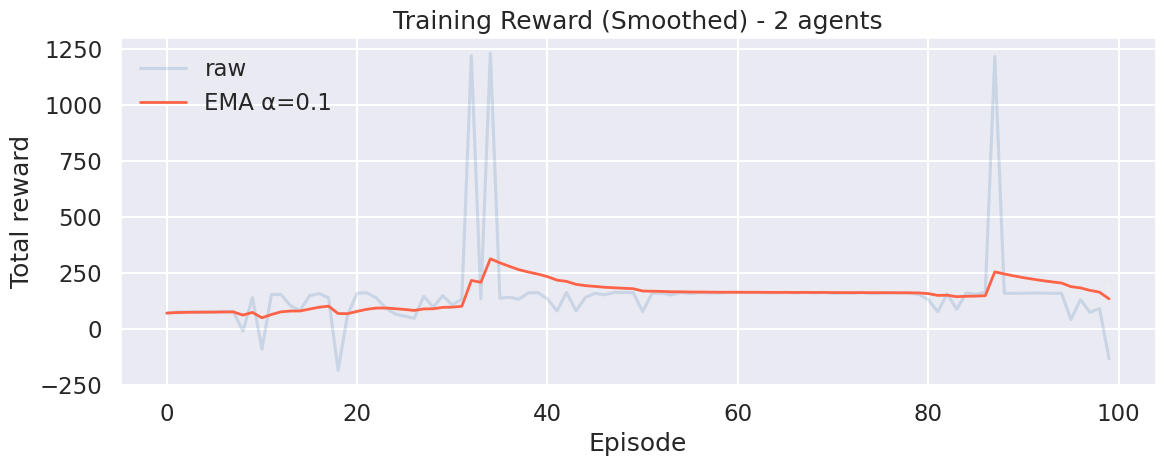

In [5]:
smoothed_rewards.append(draw_rewards(rewards_2, 2))

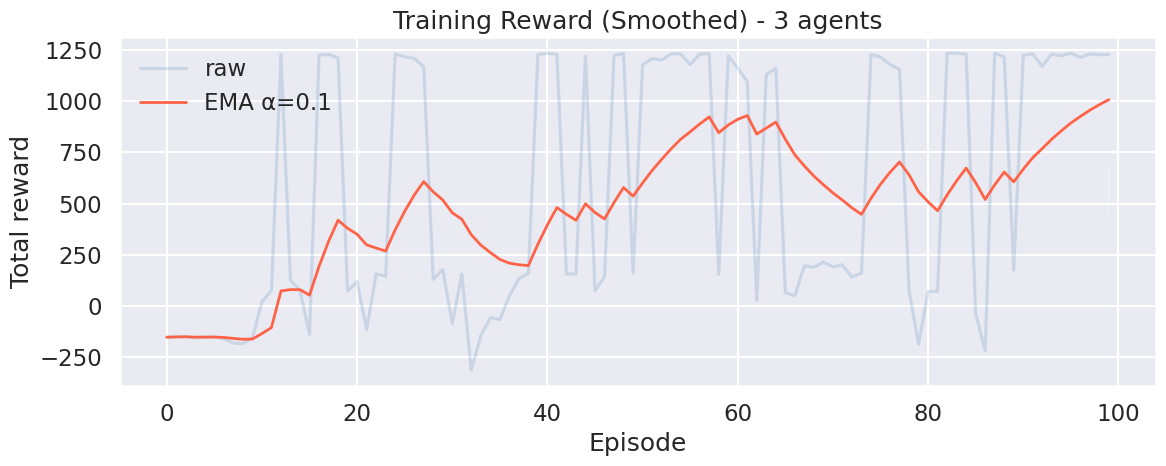

In [6]:
smoothed_rewards.append(draw_rewards(rewards_3, 3))

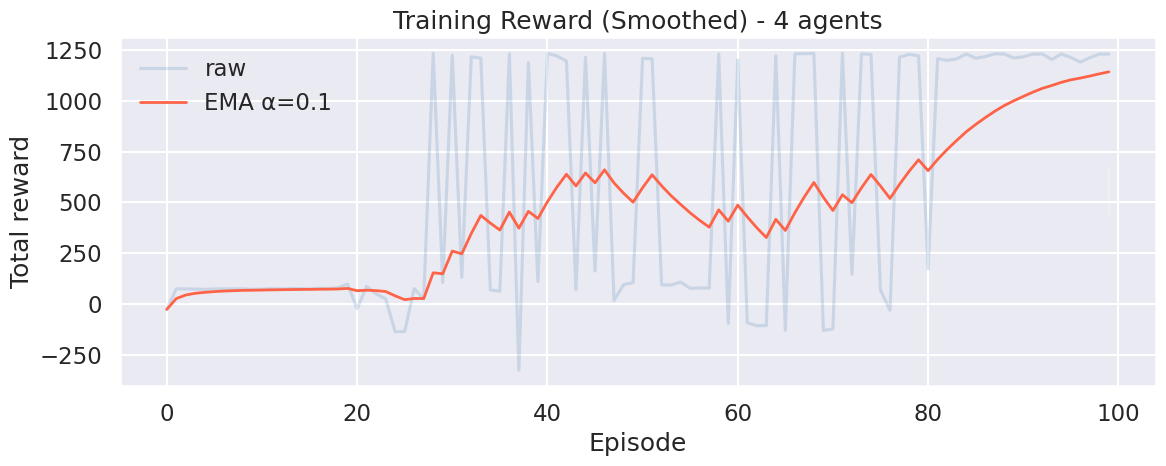

In [7]:
smoothed_rewards.append(draw_rewards(rewards_4, 4))

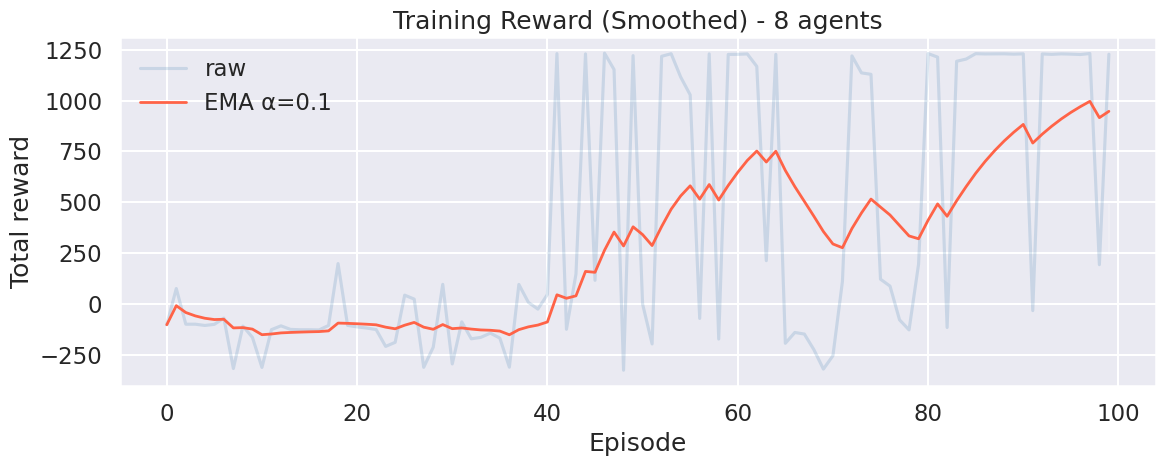

In [8]:
smoothed_rewards.append(draw_rewards(rewards_8, 8))

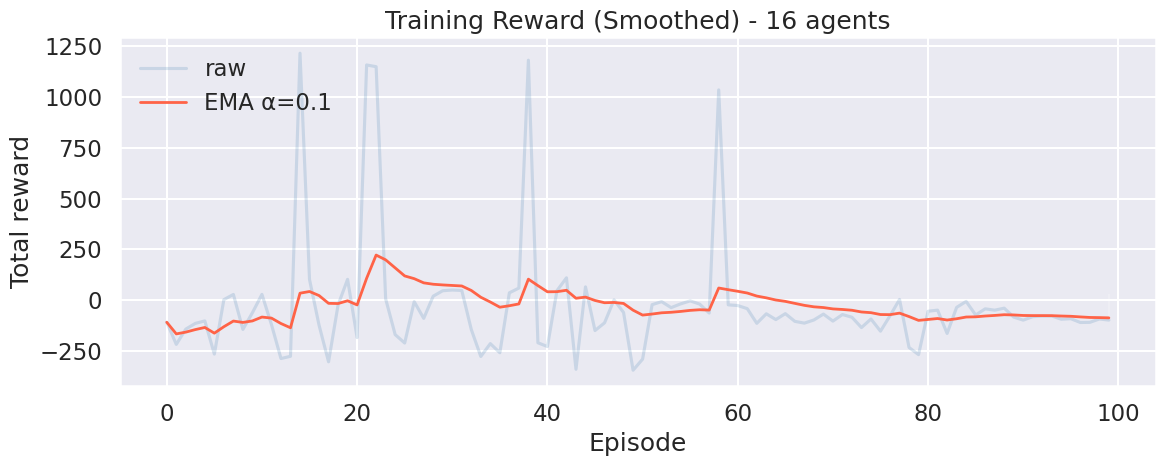

In [9]:
smoothed_rewards.append(draw_rewards(rewards_16, 16))

## StableBaselines3 TD3 results

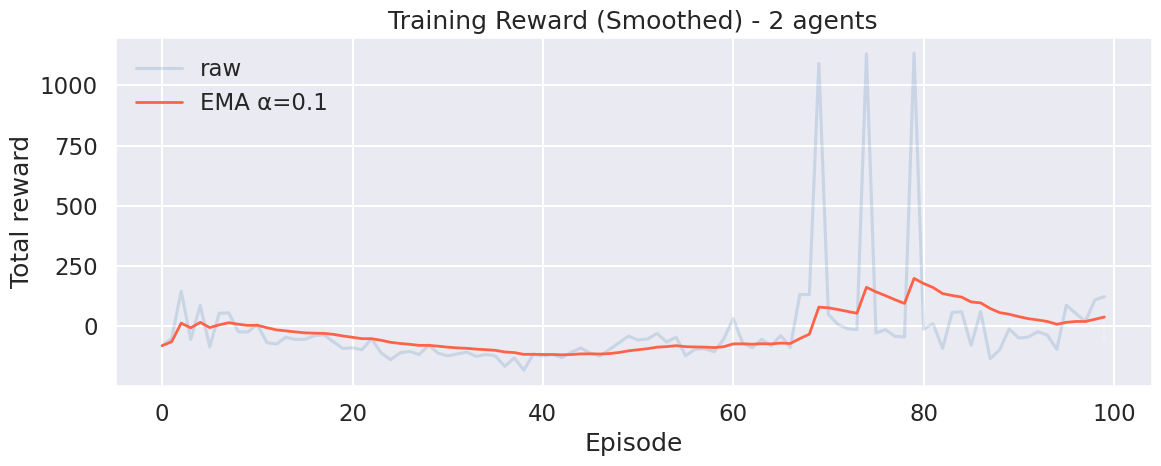

In [10]:
smoothed_rewards.append(draw_rewards(td3_rewards_2, 2))

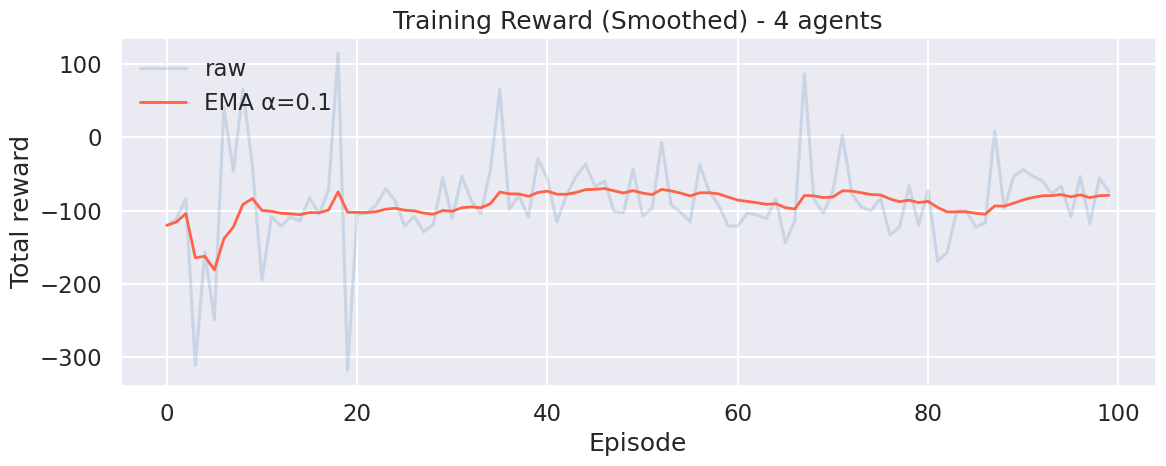

In [11]:
smoothed_rewards.append(draw_rewards(td3_rewards_4, 4))

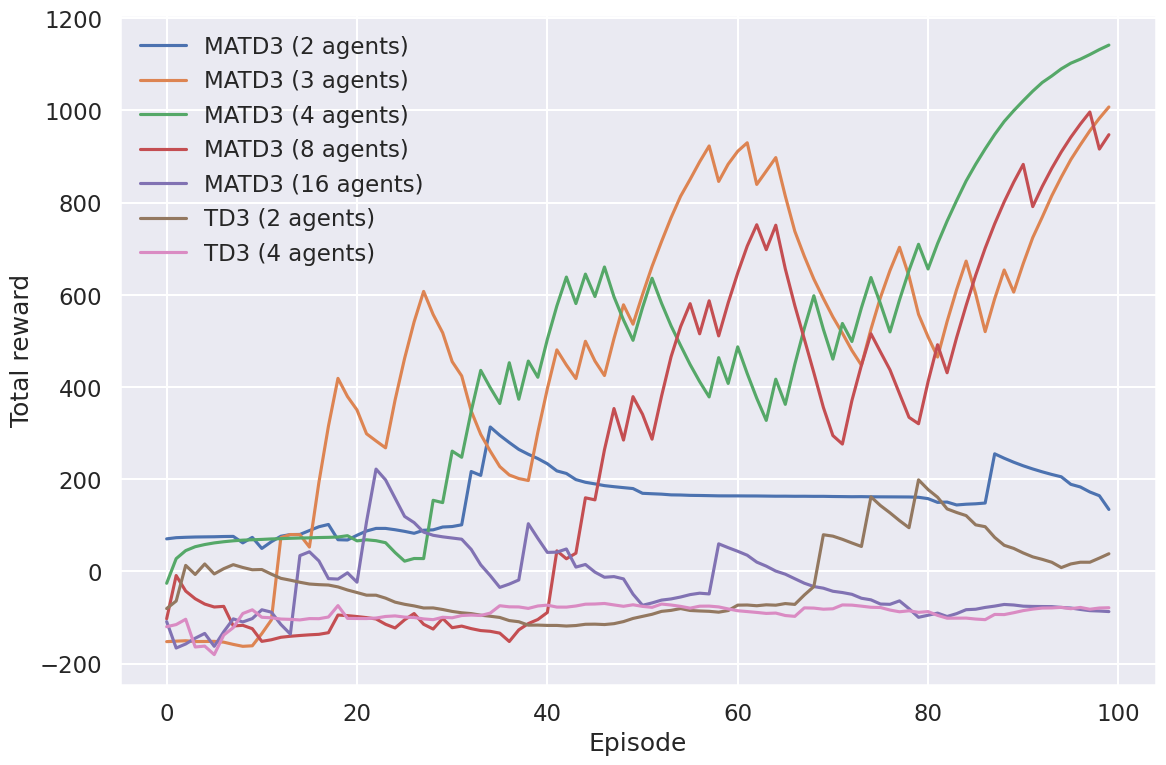

In [12]:
labels = [
    "MATD3 (2 agents)",
    "MATD3 (3 agents)",
    "MATD3 (4 agents)",
    "MATD3 (8 agents)",
    "MATD3 (16 agents)",
    "TD3 (2 agents)",
    "TD3 (4 agents)",
]
draw_comparison(smoothed_rewards, labels)